In [ ]:
import torch
from torch import nn
from torch.nn import functional as F
from torch import optim

import torchvision
from matplotlib import pyplot as plt

from utils import plot_image, plot_curve, one_hot

load dataset

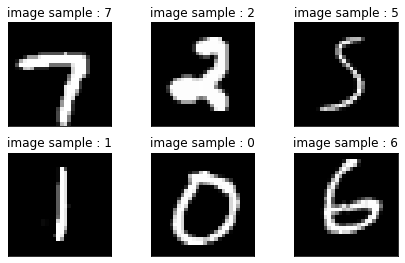

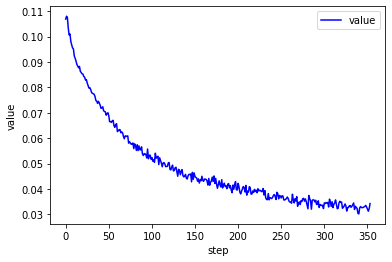

In [14]:
batch_size = 512

train_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST('mnist_data', train = True, download = True,
                               transform=torchvision.transforms.Compose([
                                   torchvision.transforms.ToTensor(),
                                   torchvision.transforms.Normalize((0.1307,),(0.3081))
                               ])), batch_size = batch_size, shuffle = True
)

test_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST('mnist_data/', train = False, download = True,
                               transform = torchvision.transforms.Compose([
                                   torchvision.transforms.ToTensor(),
                                   torchvision.transforms.Normalize((0.1307,),(0.3081))
                               ])),
                               batch_size = batch_size, shuffle = False
)
x, y = next(iter(train_loader))

plot_image(x, y, 'image sample')

class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()

        self.fc1 = nn.Linear(28*28,256)
        self.fc2 = nn.Linear(256,64)
        self.fc3 = nn.Linear(64,10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)

        return x

net = Net()
optimizer = optim.SGD(net.parameters(), lr = 0.01, momentum = 0.9)

train_loss = []
for epoch in range(3):

    for batch_idx, (x, y) in enumerate(train_loader):
        x = x.view(x.size(0), 28 * 28)
        out = net(x)
        y_onehot = one_hot(y)
        loss = F.mse_loss(out, y_onehot)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss.append(loss.item())

        # if batch_idx % 10 == 0:
        #     print(epoch, batch_idx, loss.item())

plot_curve(train_loss)


In [16]:
total_correct = 0
for x,y in test_loader:
    x = x.view(x.size(0), 28 * 28)
    out = net(x)
    pred = out.argmax(dim = 1)
    correct = pred.eq(y).sum().float().item()
    total_correct += correct

total_num = len(test_loader.dataset)
acc = total_correct / total_num    

print('test acc:', acc)

test acc: 0.893
